<a href="https://colab.research.google.com/github/harisapn/TensorFlow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Get the data

In [ ]:
import datetime
print(f"Notebook last run at: {datetime.datetime.now()}")


Notebook last run at: 2024-01-12 10:19:42.900974


In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-01-12 10:19:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.207, 64.233.182.207, 64.233.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   268MB/s    in 0.4s    

2024-01-12 10:19:43 (268 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspects the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train/")
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (384, 512, 3)


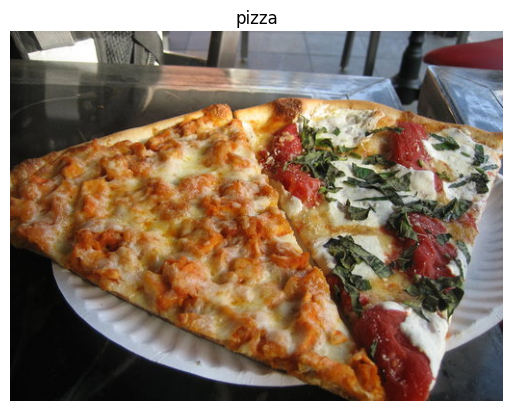

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img

array([[[ 42,  38,  35],
        [ 58,  54,  51],
        [ 57,  54,  49],
        ...,
        [154, 163, 170],
        [152, 163, 169],
        [151, 162, 168]],

       [[ 53,  49,  46],
        [ 44,  40,  37],
        [ 66,  63,  58],
        ...,
        [151, 161, 170],
        [150, 160, 169],
        [150, 160, 169]],

       [[ 50,  46,  43],
        [ 43,  39,  36],
        [ 66,  63,  58],
        ...,
        [148, 160, 172],
        [150, 162, 174],
        [151, 163, 175]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 49,  59,  71],
        [ 48,  60,  72],
        [ 49,  61,  73]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 47,  55,  66],
        [ 48,  56,  69],
        [ 48,  56,  69]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 46,  52,  64],
        [ 46,  52,  64],
        [ 46,  52,  64]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.16470588, 0.14901961, 0.1372549 ],
        [0.22745098, 0.21176471, 0.2       ],
        [0.22352941, 0.21176471, 0.19215686],
        ...,
        [0.60392157, 0.63921569, 0.66666667],
        [0.59607843, 0.63921569, 0.6627451 ],
        [0.59215686, 0.63529412, 0.65882353]],

       [[0.20784314, 0.19215686, 0.18039216],
        [0.17254902, 0.15686275, 0.14509804],
        [0.25882353, 0.24705882, 0.22745098],
        ...,
        [0.59215686, 0.63137255, 0.66666667],
        [0.58823529, 0.62745098, 0.6627451 ],
        [0.58823529, 0.62745098, 0.6627451 ]],

       [[0.19607843, 0.18039216, 0.16862745],
        [0.16862745, 0.15294118, 0.14117647],
        [0.25882353, 0.24705882, 0.22745098],
        ...,
        [0.58039216, 0.62745098, 0.6745098 ],
        [0.58823529, 0.63529412, 0.68235294],
        [0.59215686, 0.63921569, 0.68627451]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0.01960784, 0.01960784],
        [0.01960784, 0

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 42,  38,  35],
        [ 58,  54,  51],
        [ 57,  54,  49],
        ...,
        [154, 163, 170],
        [152, 163, 169],
        [151, 162, 168]],

       [[ 53,  49,  46],
        [ 44,  40,  37],
        [ 66,  63,  58],
        ...,
        [151, 161, 170],
        [150, 160, 169],
        [150, 160, 169]],

       [[ 50,  46,  43],
        [ 43,  39,  36],
        [ 66,  63,  58],
        ...,
        [148, 160, 172],
        [150, 162, 174],
        [151, 163, 175]],

       ...,

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 49,  59,  71],
        [ 48,  60,  72],
        [ 49,  61,  73]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 47,  55,  66],
        [ 48,  56,  69],
        [ 48,  56,  69]],

       [[  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5],
        ...,
        [ 46,  52,  6

In [ ]:
#View the image shape

img.shape

(384, 512, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(1./255)
valid_datagen=ImageDataGenerator(1./255)

#Setup the train and test directories

train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

#import data from directories and turn it to batches
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,#number of images to process at time
                                             target_size=(224,224), #convert all images to be 224*224
                                             class_mode="binary",
                                             seed=42)

valid_data=valid_datagen.flow_from_directory(test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#Create a CNN model
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, #can also be (2,2)
                              padding="valid"), #can also be "same"
      tf.keras.layers.Conv2D(10, 3, activation="relu"),
      tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
      tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])


#compile the model

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/5
47/47 [==============================] - 14s 159ms/step - loss: 4.1162 - accuracy: 0.6473 - val_loss: 0.6477 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4342 - accuracy: 0.8160 - val_loss: 0.5790 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 5s 114ms/step - loss: 0.2987 - accuracy: 0.8780 - val_loss: 0.5320 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.2107 - accuracy: 0.9253 - val_loss: 0.5602 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.1446 - accuracy: 0.9540 - val_loss: 0.5945 - val_accuracy: 0.7740


In [ ]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 122ms/step - loss: 197.9349 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 136ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 100ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 130ms/step - loss: 517.5816 - accuracy: 0.6327 - val_loss: 132.6521 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 213.3144 - accuracy: 0.6680 - val_loss: 331.2345 - val_accuracy: 0.6260
Epoch 3/5
47/47 [==============================] - 5s 109ms/step - loss: 167.7656 - accuracy: 0.7080 - val_loss: 65.4470 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 5s 104ms/step - loss: 101.4286 - accuracy: 0.7420 - val_loss: 77.3276 - val_accuracy: 0.7000
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 110.9278 - accuracy: 0.7020 - val_loss: 278.6410 - val_accuracy: 0.5540


In [ ]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Binary classification: Let's break it down

Image shape: (471, 512, 3)
Image shape: (382, 512, 3)


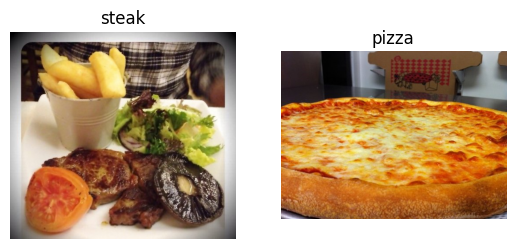

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

##Preprocess the data (prepare it for a model)

In [ ]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [ ]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
#Create the model which can be baseline (a 3 layer CNN)
model_4=Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224,224,3)),
  Conv2D(10,3,activation="relu"),
  Conv2D(10,3,activation="relu"),
           Flatten(),
           Dense(1,activation="sigmoid")

])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 138ms/step - loss: 0.9781 - accuracy: 0.6007 - val_loss: 0.5522 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4872 - accuracy: 0.7833 - val_loss: 0.4139 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2833 - accuracy: 0.8940 - val_loss: 0.3804 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 0.1196 - accuracy: 0.9673 - val_loss: 0.3786 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.0308 - accuracy: 0.9967 - val_loss: 0.4355 - val_accuracy: 0.8300


## Evaluate the model

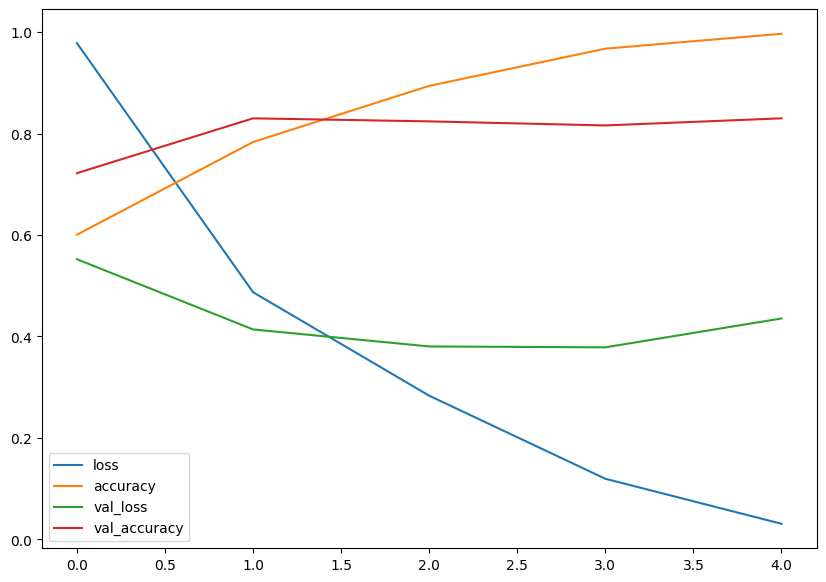

In [ ]:
import pandas as pd
#plot the training curves
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
#Plot the trainig and validation data separetely

def plot_loss_curves(history):

  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs=range(len(history.history['loss']))

   # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

   # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

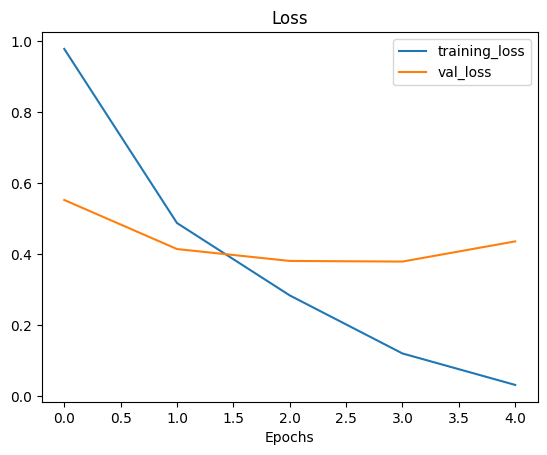

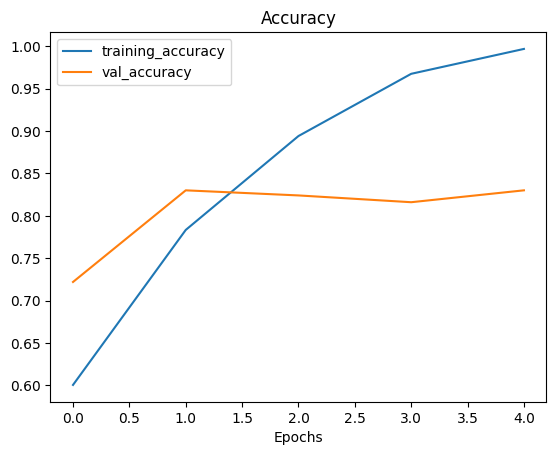

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_5=tf.keras.models.Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),#reduce number of fetaures by half
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')])

model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#fit the model

history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 131ms/step - loss: 0.6097 - accuracy: 0.6547 - val_loss: 0.4193 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4458 - accuracy: 0.7927 - val_loss: 0.3692 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4045 - accuracy: 0.8220 - val_loss: 0.3295 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3832 - accuracy: 0.8300 - val_loss: 0.3257 - val_accuracy: 0.8880
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3837 - accuracy: 0.8360 - val_loss: 0.3327 - val_accuracy: 0.8640


In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

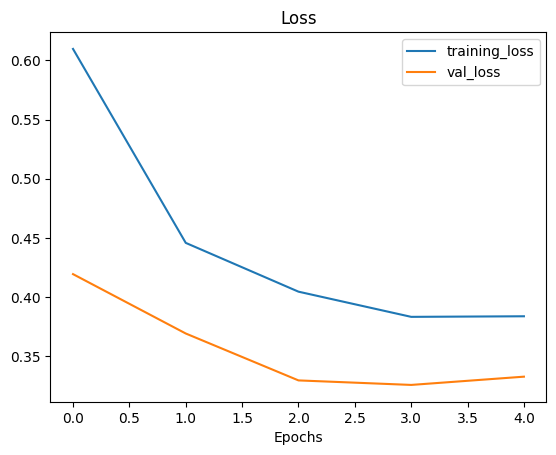

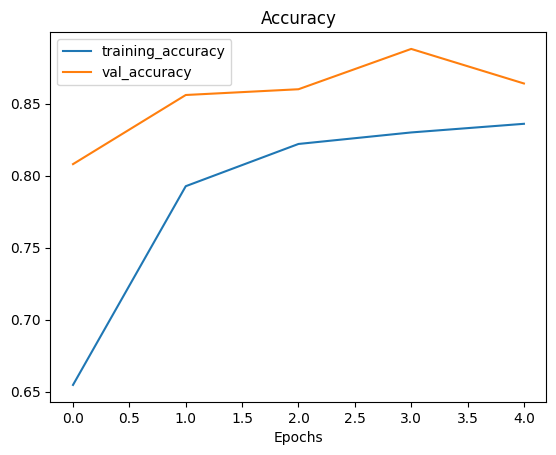

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=20,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)





In [ ]:
print("Print augmented training data:")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode='binary',
                                                                 shuffle=False) #dont shuffle for demonstration purpose
print("Non-augmented training data")
train_data_non_augmented=train_datagen.flow_from_directory(train_dir,
                                                           target_size=(224,224),
                                                           batch_size=32,
                                                           class_mode='binary',
                                                           shuffle=False)
print("unchanged test images")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode='binary')





Print augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
unchanged test images
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

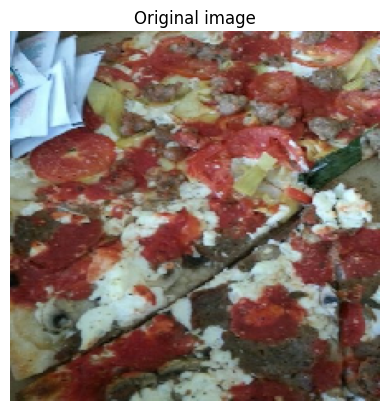

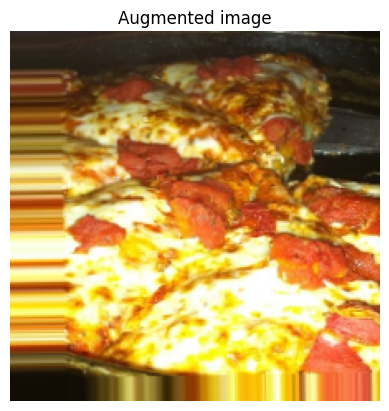

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 452ms/step - loss: 0.7276 - accuracy: 0.4753 - val_loss: 0.6852 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6961 - accuracy: 0.4960 - val_loss: 0.6832 - val_accuracy: 0.5620
Epoch 3/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6891 - accuracy: 0.5600 - val_loss: 0.6730 - val_accuracy: 0.5100
Epoch 4/5
47/47 [==============================] - 20s 434ms/step - loss: 0.6891 - accuracy: 0.5613 - val_loss: 0.6544 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6892 - accuracy: 0.5273 - val_loss: 0.6341 - val_accuracy: 0.8020


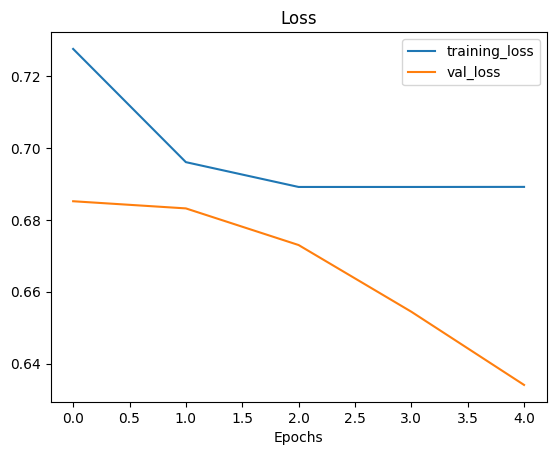

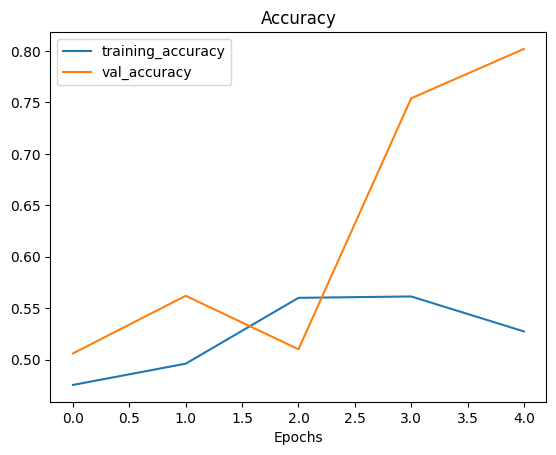

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
 #Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 499ms/step - loss: 0.6367 - accuracy: 0.6353 - val_loss: 0.5303 - val_accuracy: 0.7140
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.5532 - accuracy: 0.7160 - val_loss: 0.4196 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5057 - accuracy: 0.7500 - val_loss: 0.3738 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.4801 - accuracy: 0.7680 - val_loss: 0.3576 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 20s 426ms/step - loss: 0.4674 - accuracy: 0.7813 - val_loss: 0.3867 - val_accuracy: 0.8380


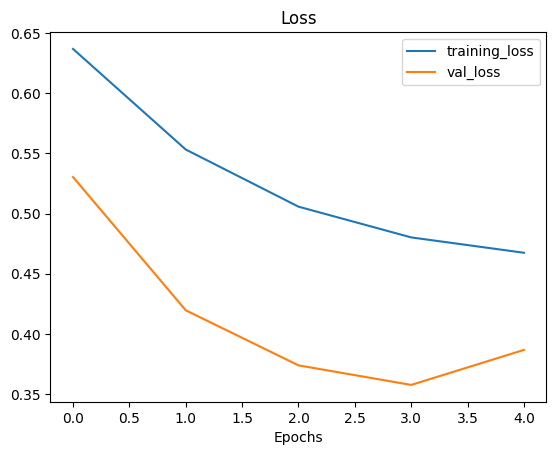

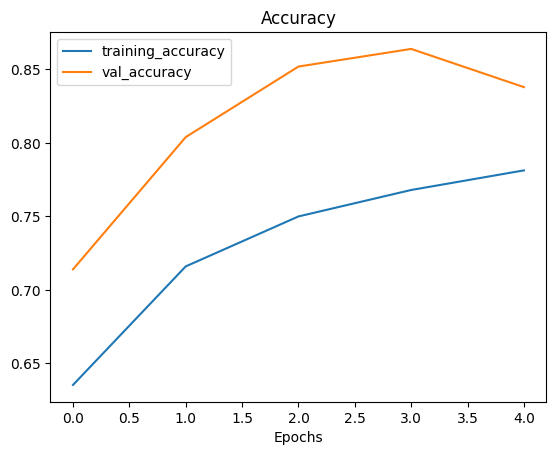

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 447ms/step - loss: 0.6496 - accuracy: 0.6087 - val_loss: 0.5559 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5688 - accuracy: 0.7153 - val_loss: 0.4732 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5123 - accuracy: 0.7573 - val_loss: 0.3764 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 465ms/step - loss: 0.4744 - accuracy: 0.7820 - val_loss: 0.3374 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 22s 456ms/step - loss: 0.4681 - accuracy: 0.7800 - val_loss: 0.3780 - val_accuracy: 0.8620


In [ ]:
# Check model_8 architecture (same as model_1)
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

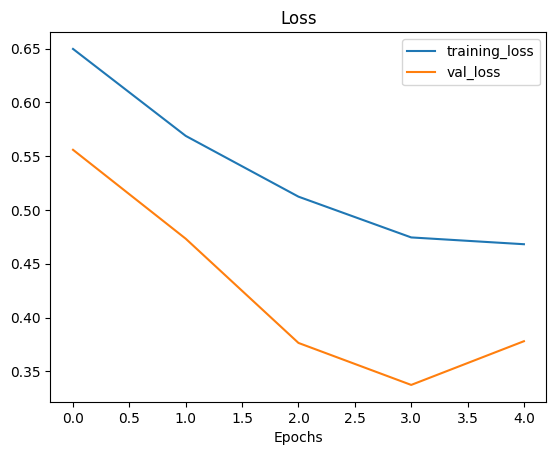

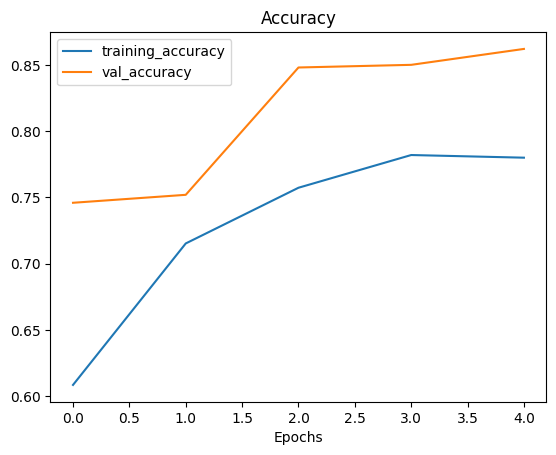

In [ ]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

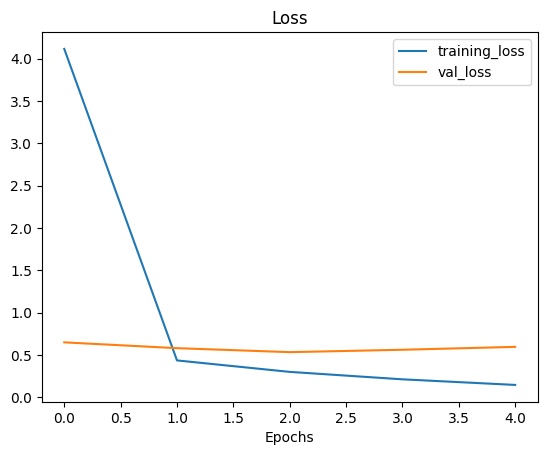

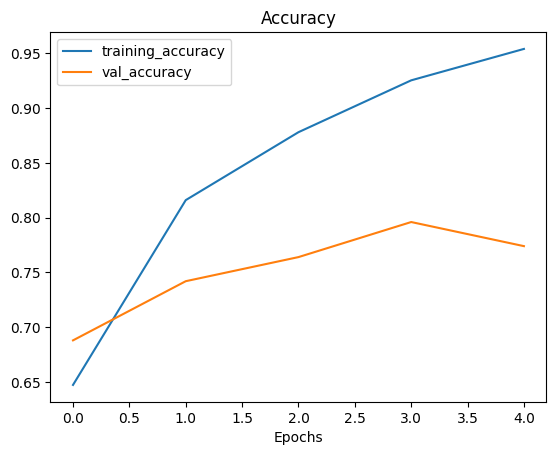

In [ ]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

##Making predictions with our trained model

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

--2024-01-12 10:30:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2024-01-12 10:30:19 (33.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



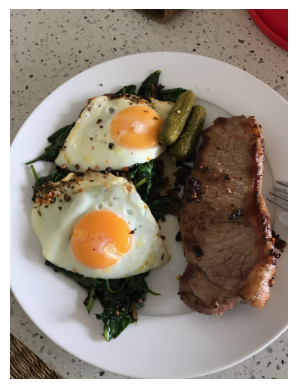

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)


In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 279ms/step


array([[0.8030579]], dtype=float32)

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


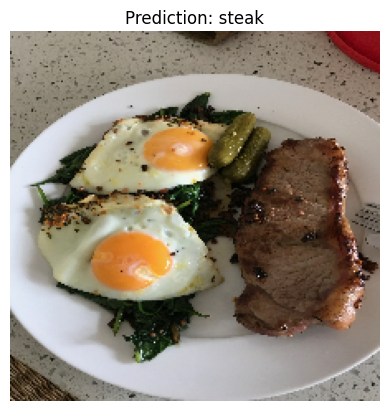

In [ ]:
 #'Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

#Multi-class classification

In [ ]:
# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2024-01-22 11:29:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 142.250.1.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   156MB/s    in 3.2s    

2024-01-22 11:29:05 (156 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Unzip the downloaded file

import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [ ]:
#setup the train and test directories

train_dir='10_food_classes_all_data/train/'
test_dir="10_food_classes_all_data/test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path('10_food_classes_all_data/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)



['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
print("Contents of the directory:", list(data_dir.glob('*')))

Contents of the directory: [PosixPath('10_food_classes_all_data/train/chicken_curry'), PosixPath('10_food_classes_all_data/train/pizza'), PosixPath('10_food_classes_all_data/train/hamburger'), PosixPath('10_food_classes_all_data/train/sushi'), PosixPath('10_food_classes_all_data/train/chicken_wings'), PosixPath('10_food_classes_all_data/train/grilled_salmon'), PosixPath('10_food_classes_all_data/train/fried_rice'), PosixPath('10_food_classes_all_data/train/steak'), PosixPath('10_food_classes_all_data/train/ice_cream'), PosixPath('10_food_classes_all_data/train/ramen')]


In [ ]:
print("Data directory:", data_dir)

Data directory: 10_food_clases_all_data/train


Image shape: (512, 512, 3)


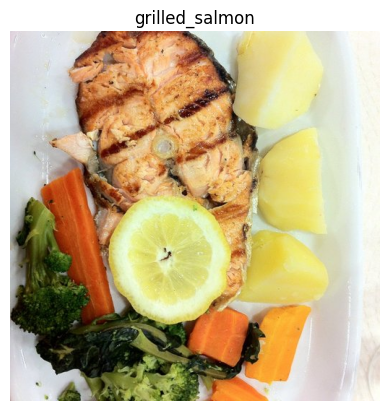

In [ ]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
#create a model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 37s 132ms/step - loss: 2.2101 - accuracy: 0.1875 - val_loss: 2.0194 - val_accuracy: 0.2764
Epoch 2/5
235/235 [==============================] - 30s 126ms/step - loss: 1.9195 - accuracy: 0.3237 - val_loss: 1.9101 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 28s 120ms/step - loss: 1.5226 - accuracy: 0.4851 - val_loss: 2.0065 - val_accuracy: 0.3156
Epoch 4/5
235/235 [==============================] - 29s 124ms/step - loss: 0.9976 - accuracy: 0.6643 - val_loss: 2.4653 - val_accuracy: 0.2860
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.4872 - accuracy: 0.8425 - val_loss: 3.3508 - val_accuracy: 0.2628


In [ ]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 3.3508 - accuracy: 0.2628


[3.3507750034332275, 0.262800008058548]

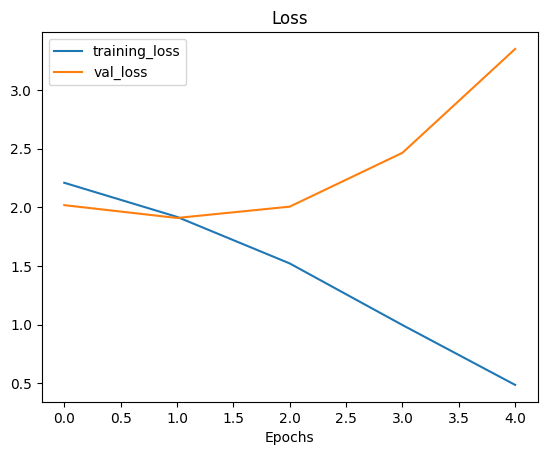

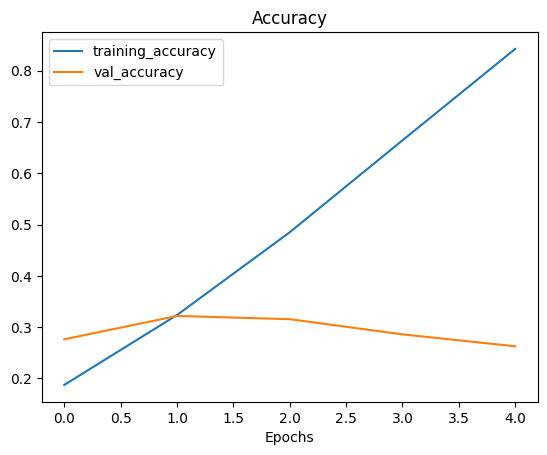

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [ ]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 118ms/step - loss: 2.0705 - accuracy: 0.2636 - val_loss: 1.9883 - val_accuracy: 0.2924
Epoch 2/5
235/235 [==============================] - 28s 118ms/step - loss: 1.7571 - accuracy: 0.4045 - val_loss: 1.8658 - val_accuracy: 0.3688
Epoch 3/5
235/235 [==============================] - 27s 116ms/step - loss: 1.3394 - accuracy: 0.5680 - val_loss: 1.9551 - val_accuracy: 0.3272
Epoch 4/5
235/235 [==============================] - 27s 117ms/step - loss: 0.8384 - accuracy: 0.7528 - val_loss: 2.3008 - val_accuracy: 0.3152
Epoch 5/5
235/235 [==============================] - 28s 120ms/step - loss: 0.4325 - accuracy: 0.8901 - val_loss: 2.7331 - val_accuracy: 0.2900


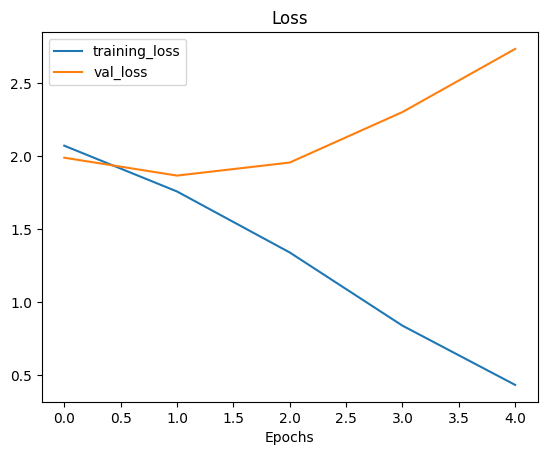

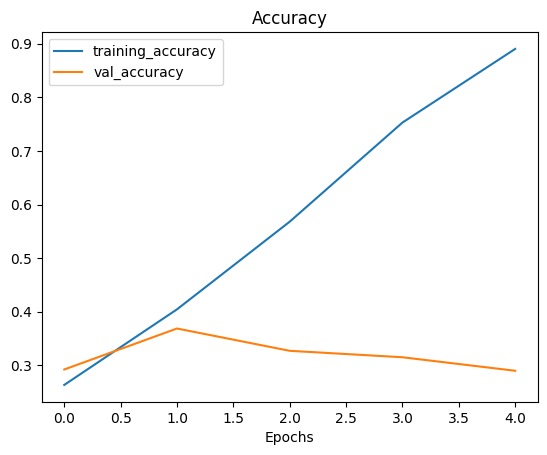

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_10)

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 454ms/step - loss: 2.2155 - accuracy: 0.2056 - val_loss: 2.0125 - val_accuracy: 0.2836
Epoch 2/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0631 - accuracy: 0.2657 - val_loss: 1.9156 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 105s 448ms/step - loss: 2.0118 - accuracy: 0.2915 - val_loss: 1.8754 - val_accuracy: 0.3540
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 1.9567 - accuracy: 0.3207 - val_loss: 1.8073 - val_accuracy: 0.3692
Epoch 5/5
235/235 [==============================] - 103s 437ms/step - loss: 1.9252 - accuracy: 0.3336 - val_loss: 1.7783 - val_accuracy: 0.3904


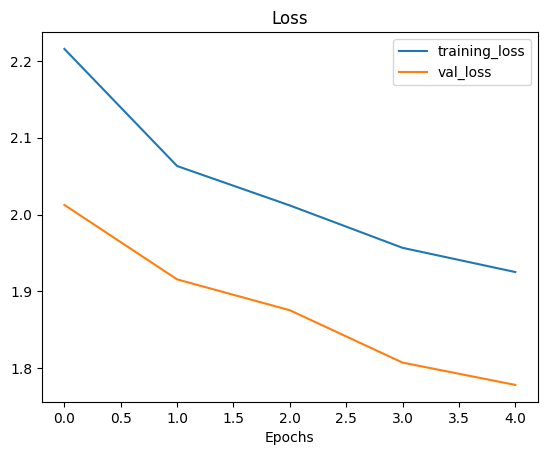

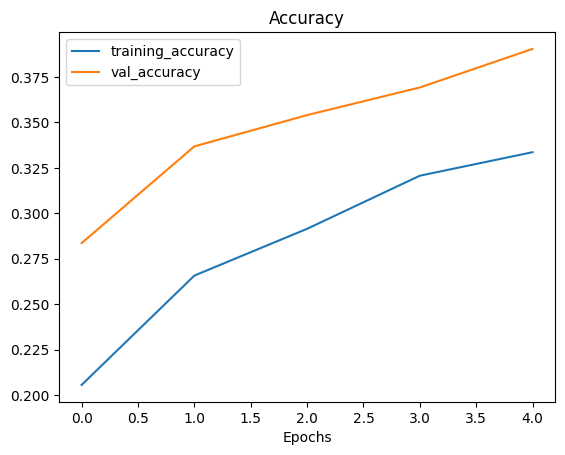

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 211ms/step


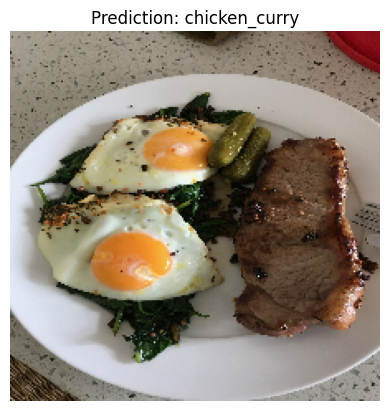

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


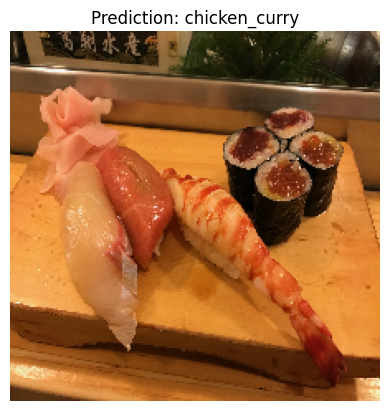

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


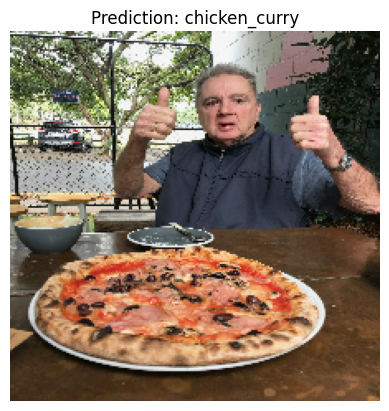

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 18ms/step


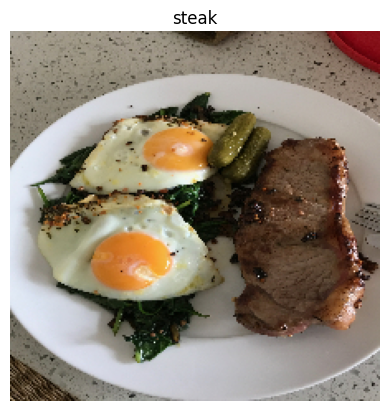

In [ ]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [ ]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 91ms/step


array([[0.02321747, 0.03879777, 0.01922251, 0.25368002, 0.08001617,
        0.04242527, 0.01558984, 0.09360881, 0.38238257, 0.05105961]],
      dtype=float32)

In [ ]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 17ms/step


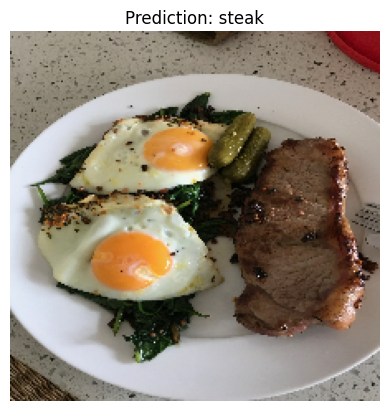

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


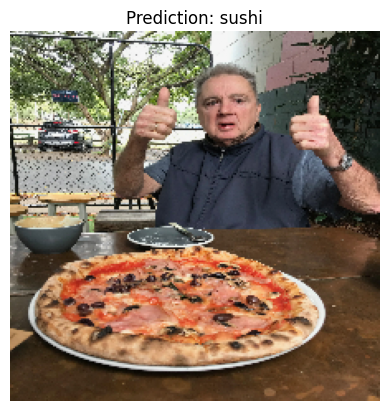

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 30ms/step


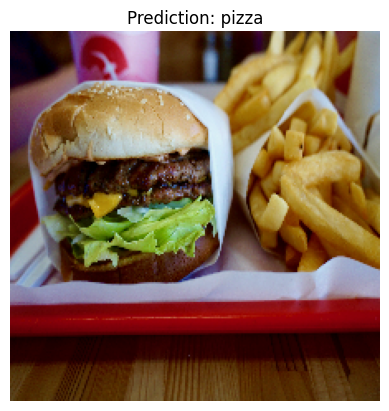

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [ ]:
# Save a model
model_11.save("saved_trained_model")

In [ ]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 8s 93ms/step - loss: 1.7783 - accuracy: 0.3904


[1.7782679796218872, 0.3903999924659729]

In [ ]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 7s 90ms/step - loss: 1.7783 - accuracy: 0.3904


[1.7782676219940186, 0.3903999924659729]